In [1]:
%matplotlib notebook
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, y = sp.symbols('x y', real=True)
eps, th, alp = sp.symbols('epsilon theta alpha', real=True, positive=True)
r = sp.sqrt(x*x + y*y)
order = 8

In [4]:
A = (1-r*r)*sp.Integral(1/(1+r*r-2*x*sp.cos(alp)-2*y*sp.sin(alp)), alp)
A

(-x**2 - y**2 + 1)*Integral(1/(x**2 - 2*x*cos(alpha) + y**2 - 2*y*sin(alpha) + 1), alpha)

In [5]:
B = A.subs(x, x*eps).subs(y, y*eps).series(eps, n=order).removeO()
B = sp.collect(B, eps)

In [6]:
C = B.subs(alp, alp+th) - B.subs(alp, alp-th)
C = sp.expand_trig(C).collect(eps)

In [7]:
SE = sp.expand_trig(C.subs(alp, 1*sp.pi/4))
SD = sp.expand_trig(C.subs(alp, 3*sp.pi/4))
LD = sp.expand_trig(C.subs(alp, 5*sp.pi/4))
LE = sp.expand_trig(C.subs(alp, 7*sp.pi/4))

In [8]:
S1 = SE + LD
S1 = sp.simplify(S1)
S2 = LE + SD
S2 = sp.simplify(S2)
if order < 7:
    S1

In [9]:
D1 = SE - LD
D1 = sp.simplify(D1)
D2 = LE - SD
D2 = sp.simplify(D2)

In [10]:
X = (D1/S1 + D2/S2)/2
X = X.series(eps, n=order).removeO()
X = X.subs(eps, 1).collect(x).collect(y)
Y = (D1/S1 - D2/S2)/2
Y = Y.series(eps, n=order).removeO()
Y = Y.subs(eps, 1).collect(x).collect(y)
if order < 7:
    X

In [11]:
# X2 = X.subs(x, x/sp.sqrt(2)/sp.sin(th)*th).subs(y, y/sp.sqrt(2)/sp.sin(th)*th).expand().collect(x).collect(y)
X2 = (X/sp.sqrt(2)/sp.sin(th)*th).expand().collect(x).collect(y)
X2.series(th, n=12).removeO().expand().collect(x).collect(y)

x**7*(-172096*theta**10/51975 + 160*theta**8/21 - 1088*theta**6/105 + 32*theta**4/5 - 1) + x**5*(9848*theta**10/155925 - 4132*theta**8/14175 + 24*theta**6/35 - 4*theta**4/15 - 4*theta**2/3 + y**2*(27576992*theta**10/467775 - 1877104*theta**8/14175 + 2656*theta**6/15 - 5264*theta**4/45 + 80*theta**2/3 - 3) + 1) + x**3*(8*theta**10/42525 - 4*theta**8/945 + 8*theta**6/135 - 4*theta**4/9 + 4*theta**2/3 + y**4*(-355648*theta**10/4725 + 2257184*theta**8/14175 - 184256*theta**6/945 + 1696*theta**4/15 - 64*theta**2/3 - 3) + y**2*(-9376*theta**10/13365 + 49472*theta**8/14175 - 352*theta**6/35 + 608*theta**4/45 - 16*theta**2/3 + 2) - 1) + x*(y**6*(5611616*theta**10/467775 - 44656*theta**8/2025 + 1184*theta**6/63 + 16*theta**4/45 - 16*theta**2/3 - 1) + y**4*(14216*theta**10/31185 - 196*theta**8/81 + 488*theta**6/63 - 188*theta**4/15 + 20*theta**2/3 + 1) + y**2*(-8*theta**10/17325 + 4*theta**8/405 - 8*theta**6/63 + 4*theta**4/5 - 4*theta**2/3 - 1) + 1)

In [17]:
X3 = X2.subs(th, 1/4)
xp = sp.lambdify(x, X3.subs(y,0), 'numpy')
xp = xp(np.linspace(0,0.70))
np.linspace(0,0.70), xp

(array([0.        , 0.01428571, 0.02857143, 0.04285714, 0.05714286,
        0.07142857, 0.08571429, 0.1       , 0.11428571, 0.12857143,
        0.14285714, 0.15714286, 0.17142857, 0.18571429, 0.2       ,
        0.21428571, 0.22857143, 0.24285714, 0.25714286, 0.27142857,
        0.28571429, 0.3       , 0.31428571, 0.32857143, 0.34285714,
        0.35714286, 0.37142857, 0.38571429, 0.4       , 0.41428571,
        0.42857143, 0.44285714, 0.45714286, 0.47142857, 0.48571429,
        0.5       , 0.51428571, 0.52857143, 0.54285714, 0.55714286,
        0.57142857, 0.58571429, 0.6       , 0.61428571, 0.62857143,
        0.64285714, 0.65714286, 0.67142857, 0.68571429, 0.7       ]),
 array([0.        , 0.01428304, 0.02855003, 0.04278498, 0.05697205,
        0.07109558, 0.08514015, 0.09909067, 0.11293243, 0.12665113,
        0.14023293, 0.15366452, 0.16693315, 0.18002665, 0.19293343,
        0.20564259, 0.21814381, 0.23042746, 0.24248451, 0.25430658,
        0.26588586, 0.27721512, 0.28828761, 0.

In [16]:
sp.interpolating_spline(3, x, np.linspace(0,1), xp).expand().collect(x)

Piecewise((0, (x >= 0) & (x <= 0.0408163265306122)), (-5.48364788753655e+23*x**3 + 6.71467088269781e+22*x**2 - 2.74068199293788e+21*x + 3.72881903801073e+19, (x >= 0.0408163265306122) & (x <= 0.0612244897959184)), (1.82788262917887e+24*x**3 - 3.69306898548384e+23*x**2 + 2.39809674382067e+22*x - 5.08051593928966e+20, (x >= 0.0612244897959184) & (x <= 0.0816326530612245)), (-2.19345915501468e+24*x**3 + 6.1551149758065e+23*x**2 - 5.64123710213062e+22*x + 1.67952224170404e+21, (x >= 0.0816326530612245) & (x <= 0.102040816326531)), (1.09672957750737e+24*x**3 - 3.9168913482406e+23*x**2 + 4.63632037138683e+22*x - 1.81624560643115e+21, (x >= 0.102040816326531) & (x <= 0.122448979591837)), (-1.90811890371087e+23*x**3 + 8.12852819476179e+22*x**2 - 1.15520309928678e+22*x + 5.47641524456041e+20, (x >= 0.122448979591837) & (x <= 0.142857142857143)), (2.4863339391955e+22*x**3 - 1.11469593794e+22*x**2 + 1.65257491099186e+21*x - 8.11492328706114e+19, (x >= 0.142857142857143) & (x <= 0.163265306122449)

In [39]:
xi = Xi.subs(th, 1/4).subs(y, 0)
xi = sp.lambdify(x, xi, 'numpy')
xi = xi(np.linspace(0,1))

In [40]:
xn = X2.subs(th, 1/4).subs(y, 0)
xn = sp.lambdify(x, xn, 'numpy')
xn = xn(np.linspace(0,1))

<IPython.core.display.Javascript object>


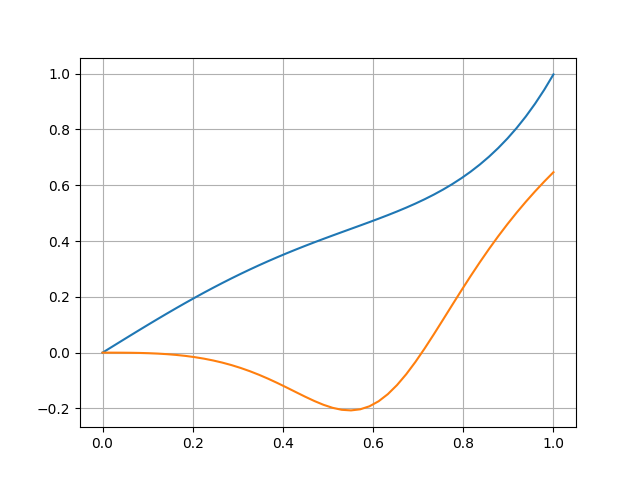

In [42]:
f = plt.figure()
plt.plot(np.linspace(0,1), xn)
plt.plot(np.linspace(0,1), xi)
plt.grid()
f.show()

# Polynom Inversion

In [1]:
%matplotlib notebook
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.linalg.svd?

In [353]:
def calc_inverse(x, poly, iorder=None):
    i, m = sp.symbols('i m', cls=sp.Idx)
    a = sp.IndexedBase('a')
    b = sp.IndexedBase('b')
    order = len(poly)-1
    iorder = iorder or order
    f = sp.summation(a[i]*x**(i+1), (i, 0, iorder))
    
    g = 0
    for l, c in enumerate(poly):
        g += c*x**(l+1)
    
    pol = sp.Poly(f.subs(x, g), x)
    coefs = []
    for cos in pol.coeffs():
        coef = []
        for j in range(0, iorder):
            co = sp.Poly(cos, a[j])
            if len(co.monoms()) > 1:
                coef.append(co.coeffs()[0])
            elif co.monoms()[0][0] == 1:
                coef.append(co.coeffs()[0])
            else:
                coef.append(0)
        coefs.append(coef)
    Matn = sp.Matrix(coefs)
    Matn = np.array(Matn, dtype=float)
    Matn *= 0.5**(np.arange(Matn.shape[0])[::-1][:, None])
    u, s, vh = np.linalg.svd(Matn, full_matrices=False)
    iMatn = vh.T@np.diag(1/s)@u.T

    sol = iMatn[:, -1]
    fn = 0
    for l, c in enumerate(sol):
        fn += c*x**(l+1)
    return g, fn


In [341]:
x = sp.symbols('x', real=True)
xn = np.linspace(0, 1, 1000)[1:]

In [342]:
poly = np.array([8.57433e+06, 0, 4.01544e+06, 0, 3.94658e+06, 0, -1.1398e+06, 0, 2.43619e+07])
poly /= poly[0]
poly = poly[:9]

In [356]:
FNs = []
for i in range(-1, 1):
    gn, fn = calc_inverse(x, poly, iorder=len(poly)-1+2*i)
    FNs.append(sp.lambdify(x, fn, 'numpy'))

GN = sp.lambdify(x, gn, 'numpy')
fit = np.poly1d(np.polyfit(GN(xn), xn, deg=len(poly)-1))

<IPython.core.display.Javascript object>


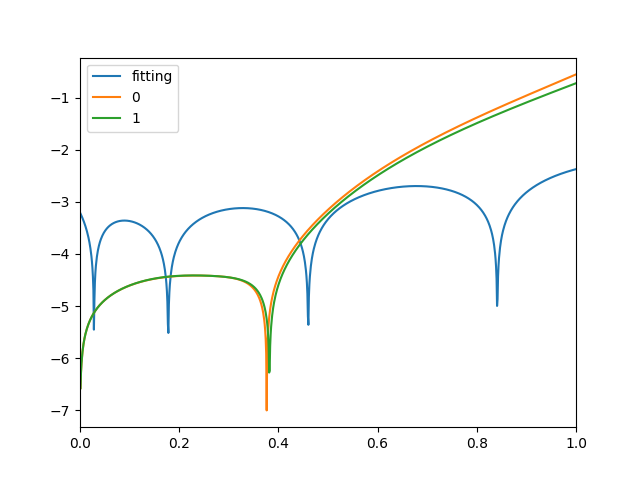

<IPython.core.display.Javascript object>


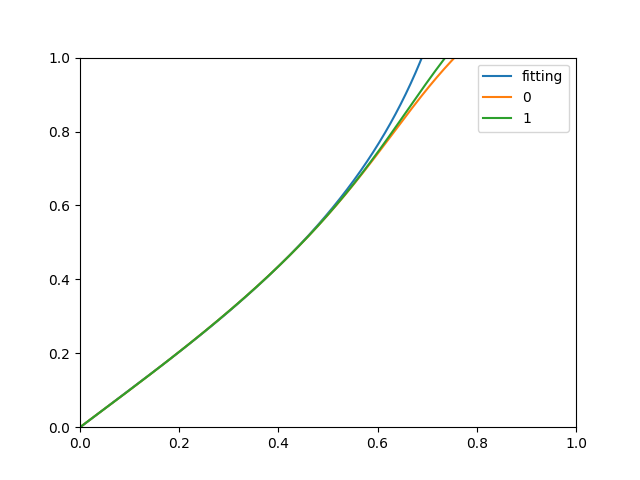

In [357]:
f = plt.figure()
plt.plot(xn, np.log10(np.abs(GN(fit(xn))-xn)), label='fitting')
for i, FN in enumerate(FNs):
    plt.plot(xn, np.log10(np.abs(GN(FN(xn))-xn)), label='{:d}'.format(i))
plt.legend()
plt.xlim([0, 1])

f = plt.figure()
# plt.plot(xn, GN(xn), label='G')
plt.plot(fit(xn), xn, label='fitting')
for i, FN in enumerate(FNs):
    plt.plot(FN(xn), xn, label='{:d}'.format(i))
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [292]:
i, j, m = sp.symbols('i j m', cls=sp.Idx)
a = sp.IndexedBase('a')
x, y, eps = sp.symbols('x y eps', real=True)
f = sp.summation(sp.summation(a[5*i + j]*x**(2*i+1)*y**(2*j), (j, 0, 4)), (i, 0, 4))
f = f.subs(x, x*eps).subs(y, y*eps).series(eps, n=10).removeO().subs(eps, 1).collect(x).collect(y)
f

x**9*a[20] + x**7*(y**2*a[16] + a[15]) + x**5*(y**4*a[12] + y**2*a[11] + a[10]) + x**3*(y**6*a[8] + y**4*a[7] + y**2*a[6] + a[5]) + x*(y**8*a[4] + y**6*a[3] + y**4*a[2] + y**2*a[1] + a[0])